In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=OneHotEncoder()
data=pd.read_csv("E:/Assignments/ASsignment week 12/Desicion trees/Assignment/Fraud_check.csv")
lb = LabelEncoder()

In [2]:
data.isnull().sum()
data.dropna()
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [3]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [4]:
data['status']=data.loc[data['Taxable.Income']>=30000,['Taxable.Income']]==0
data['status']=data.loc[data['Taxable.Income']<30000,['Taxable.Income']]==1

In [5]:
data['Undergrad']=lb.fit_transform(data['Undergrad'])
data.head()
data['Marital.Status']=lb.fit_transform(data['Marital.Status'])
data['Urban']=lb.fit_transform(data['Urban'])
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,NaN
1,1,0,33700,134075,18,1,NaN
2,0,1,36925,160205,30,1,NaN
3,1,2,50190,193264,15,1,NaN
4,0,1,81002,27533,28,0,NaN


In [6]:
data['status']=data['status'].fillna(1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int32 
 1   Marital.Status   600 non-null    int32 
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    int32 
 6   status           600 non-null    object
dtypes: int32(3), int64(3), object(1)
memory usage: 25.9+ KB


In [8]:
data['status']=lb.fit_transform(data['status'])
data['status'].head(n=100)

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    0
97    1
98    0
99    1
Name: status, Length: 100, dtype: int32

In [9]:
colnames =list(data.columns)

In [10]:
predictors = colnames[:6]
target = colnames[6]

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)

In [12]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import tree

In [99]:
model = DT(criterion ='entropy',max_depth=5, min_impurity_decrease=0.711,max_features=2, ccp_alpha=0.34)
model.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.34, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.711, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,42,0
1,0,138


In [101]:
np.mean(preds == test[target]) 

1.0

In [102]:
# Prediction on Train Data
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])
np.mean(preds == train[target])

1.0

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

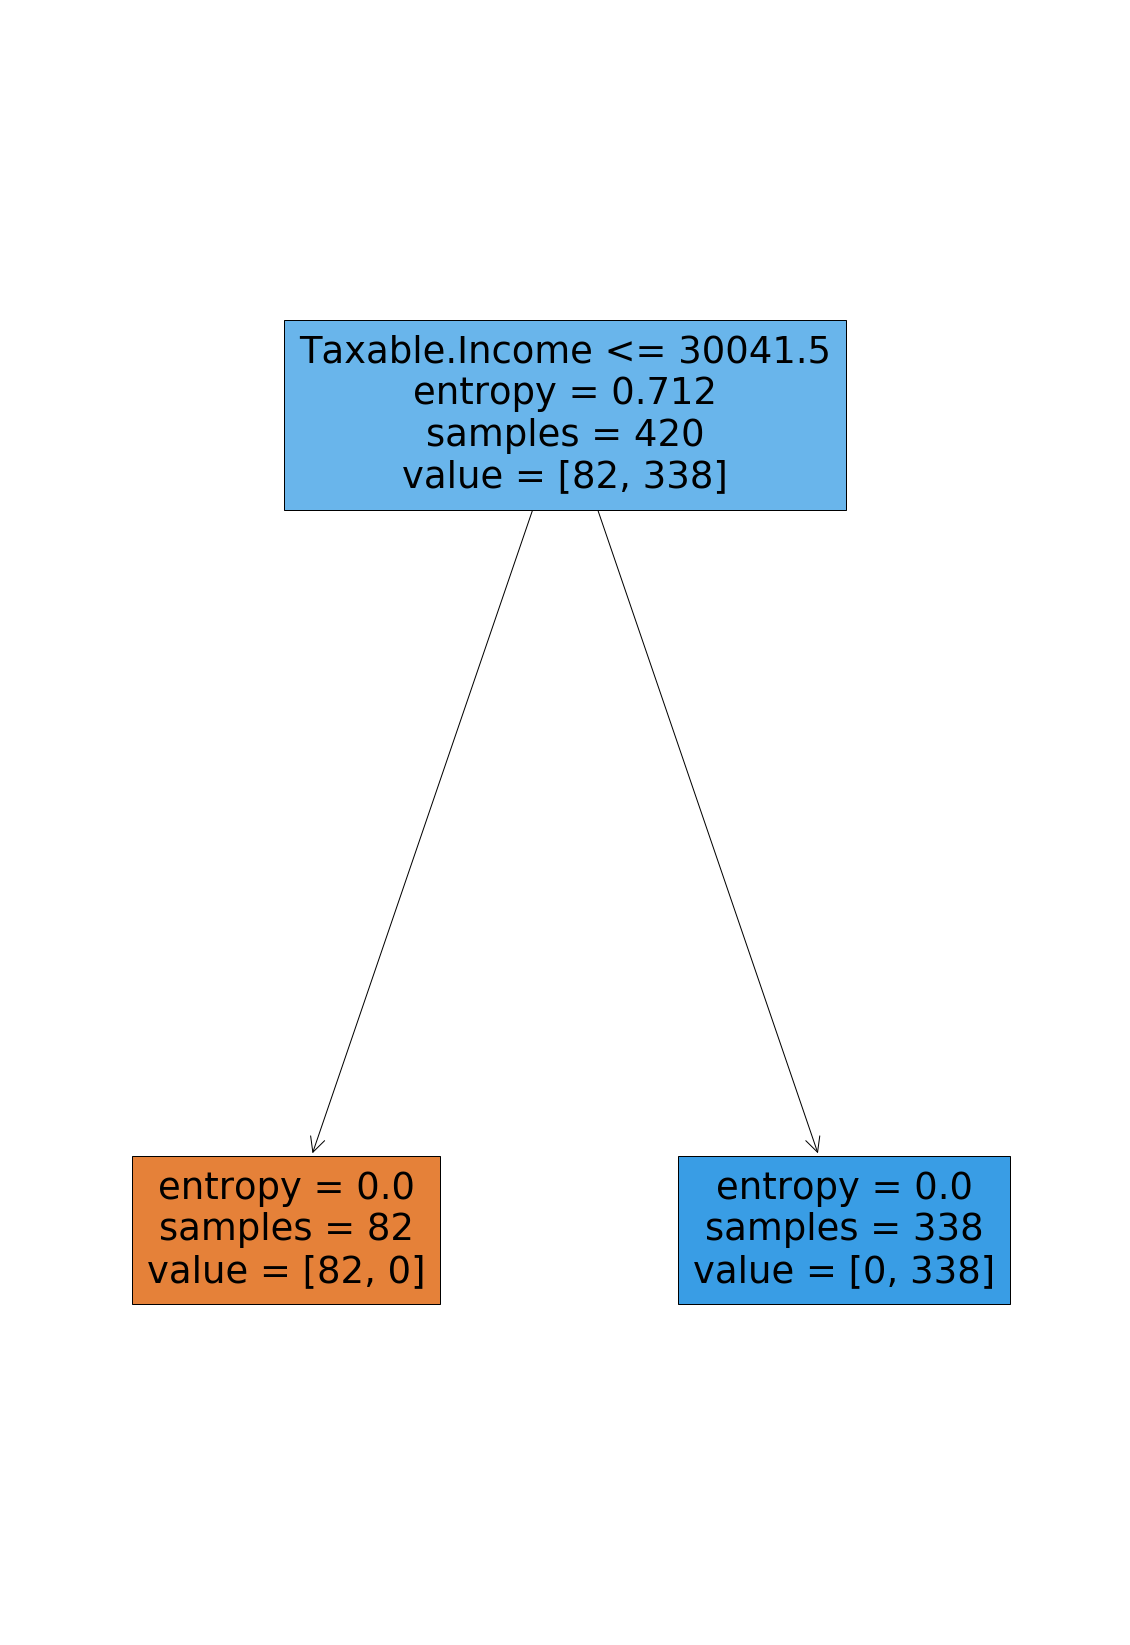

In [104]:
plt.figure(figsize=(20,30))
features = data.columns
tree.plot_tree(model,feature_names=data.columns,filled=True)
plt.show()